In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

#modelling 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [9]:
from pathlib import Path

In [10]:
csv_path = Path(r"C:\Users\ranji\OneDrive\Desktop\1st_mlproject\src\components\notebook\data\stud.csv")
df = pd.read_csv(csv_path)

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
x = df.drop(columns = ['math_score'], axis = 1)


In [14]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
y = df['math_score']

In [16]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [18]:
#create column Transfer with 3 types of transformers 

num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
     ("OneHotEncoder", oh_transformer, cat_features),
     ("StandardScaler", numeric_transformer, num_features)
])



In [19]:
x = preprocessor.fit_transform(x)

In [20]:
x.shape

(1000, 19)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [31]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse  = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('-R2 Score: {:.4f}'.format(model_train_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
-R2 Score: 0.8743


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
-R2 Score: 0.8071


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
-R2 Score: 0.8743


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
-R2 Score: 0.8555


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
-R2 Score: 0.9997


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2970
- Mean Absolute Error: 1.8170
-R2 Score: 0.9766


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
-R2 Score: 0.9955


CatBoosting Regressor
Model performance for Training set
- Root 

In [33]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending= False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.853999
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.848291
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.741040


In [36]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("accuracy of the model is %.2f"%score)


accuracy of the model is 88.04


In [39]:
rf_model = RandomForestRegressor(n_estimators = 100,random_state= 42)
rf_model = rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("accuracy of the model is %.2f"% score)

accuracy of the model is 85.12


Text(0, 0.5, 'Predicted')

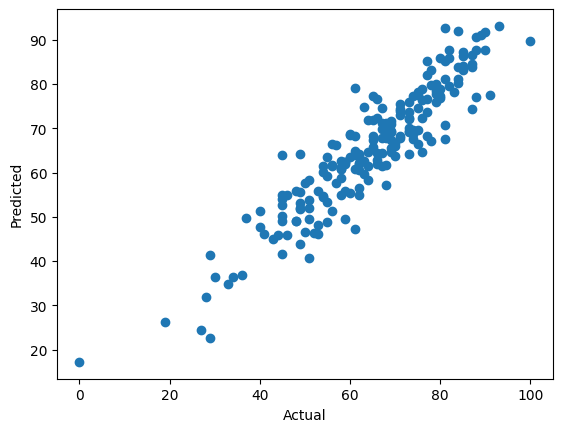

In [40]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual')
plt.ylabel('Predicted')



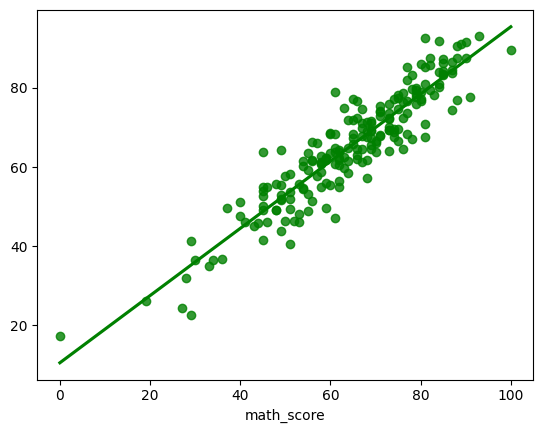

In [43]:
sns.regplot(x=y_test, y=y_pred, ci = None, color = 'green');

In [44]:
pred_df = pd.DataFrame({'Actual Value': y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.58,13.42
737,53,55.80,-2.80
740,80,76.74,3.26
660,74,77.26,-3.26
411,84,80.20,3.80
...,...,...,...
408,52,46.43,5.57
332,62,60.64,1.36
208,74,67.54,6.46
613,65,68.29,-3.29
